# Primero vamos a crear una neurona:


In [1]:
import numpy as np

In [2]:
sigm = (lambda x: 1 / (1+np.exp(-x)),
        lambda x: x * (1-x))

mse_loss = (lambda yp, yr: np.mean((yp-yr)**2),
            lambda Yp, Yr: 2*(Yp - Yr))

In [3]:
class neurona():
    def __init__(self, weights, bias, fun_act):
        self.weights = weights
        self.bias = bias
        self.fun_act = fun_act

    def feedforward(self, inputs):
        z = self.bias + np.dot(self.weights, inputs)
        return self.fun_act[0](z)

In [4]:
# Cramos nuestra primera neurona:
w = np.array([1, 0])
bias = 1
n_ejemplo = neurona(w, bias, sigm)

print(n_ejemplo.weights)
print(n_ejemplo.bias)
x = np.array([1, 1])
y = n_ejemplo.feedforward(x)
print(y)

[1 0]
1
0.8807970779778823


In [209]:
# creamos nuestra primera red neuronal.

class my_neural_network():
    def __init__(self, topologia, act_fun):
        self.topologia = topologia
        self.act_fun = act_fun
        self.pesos = []
        self.bias = []

        for i in range(len(topologia)-1):
            wi = np.random.rand(topologia[i], topologia[i+1])
            bi = np.random.rand(topologia[i+1])
            self.pesos.append(wi)
            self.bias.append(bi)
        self.bias[-1] = np.random.rand(1)

    def feedforward(self, x):
        a = x
        for w, b in zip(self.pesos, self.bias):
            z = np.dot(a, w) + b
            a = self.act_fun[0](z)
        return a

    def train(self, data, y_true, lr=0.01, epochs=100):
        for epoch in range(epochs):
            for x, y in zip(data, y_true):
                activation = [x]
                a = x
                for w, b in zip(self.pesos, self.bias):
                    z = np.dot(a, w) + b
                    a = self.act_fun[0](z)
                    activation.append(a)

                # Backpropagation
                deltas = []
                for l in reversed(range(len(self.topologia)-1)):
                    a = activation[l+1]
                    z = a @ self.pesos[l].T + self.bias[l]

                    if l == len(self.topologia) - 2:
                        deltas.insert(0, self.act_fun[1](a) * mse_loss[1](a, y))
                    else:
                        deltas.insert(0, np.dot(deltas[0], _w.T) * self.act_fun[1](a))

                    _w = self.pesos[l]

                    self.bias[l] = self.bias[l] - lr * np.mean(deltas[0], axis=0, keepdims=True)
                    self.pesos[l] = self.pesos[l] - lr * np.dot(np.expand_dims(activation[l], axis=1), np.expand_dims(deltas[0], axis=0))

        return activation[-1]

topologia = [2, 2, 1]
act_fun = (sigm[0], sigm[1])

red = my_neural_network(topologia, act_fun)
x = np.array([[1, 1], [2, 2]])
y = red.feedforward(x)
print(red.pesos)
print(red.bias)
print(y)

red.train(x, np.array([[1], [1]]))


[array([[0.67413033, 0.39561082],
       [0.01412828, 0.57215117]]), array([[0.92927571],
       [0.91032372]])]
[array([0.21965972, 0.72598256]), array([0.09166164])]
[[0.82095106]
 [0.84751389]]


array([0.86133531])

In [210]:
topologia = [2, 2, 1]
act_fun = (sigm[0], sigm[1])

red = my_neural_network(topologia, act_fun)
x = np.array([[1, 1], [2, 2]])

# Salidas antes del entrenamiento
y_before = red.feedforward(x)

print("Pesos iniciales:")
print(red.pesos)
print("Sesgos iniciales:")
print(red.bias)
print("Salidas antes del entrenamiento:")
print(y_before)

red.train(x, np.array([[1], [1]]))

# Salidas después del entrenamiento
y_after = red.feedforward(x)

print("Pesos finales:")
print(red.pesos)
print("Sesgos finales:")
print(red.bias)
print("Salidas después del entrenamiento:")
print(y_after)

Pesos iniciales:
[array([[0.72373937, 0.18068184],
       [0.97783174, 0.84133393]]), array([[0.19901478],
       [0.85017155]])]
Sesgos iniciales:
[array([0.18155677, 0.7386759 ]), array([0.18880429])]
Salidas antes del entrenamiento:
[[0.74781475]
 [0.76550152]]
Pesos finales:
[array([[0.72530339, 0.18874333],
       [0.97939576, 0.84939542]]), array([[0.27059925],
       [0.92007301]])]
Sesgos finales:
[array([0.18538947, 0.74250859]), array([0.26685581])]
Salidas después del entrenamiento:
[[0.78403211]
 [0.80194229]]


array([[0.84296286],
       [0.85577101]])

In [145]:
topologia = [2, 2, 1]
for l in reversed(range(len(topologia)-1)):
    print(l)

print(len(topologia)-1)

1
0
2


In [7]:
import random
import pandas as pd

In [21]:
# Creamos nuestro dataset de hombres y mujeres, con su altura y su peso.

hombres = 1000
mujeres = 1000

h_peso = 70
h_alt = 170
h_des = 10

m_peso = 50
m_alt = 160
m_des = 10

m_data = [np.random.normal(m_peso, m_des, mujeres), np.random.normal(
    m_alt, m_des, mujeres), np.zeros(mujeres)]
m_data = np.array(m_data).T

h_data = [np.random.normal(h_peso, h_des, hombres), np.random.normal(
    h_alt, h_des, hombres), np.ones(hombres)]
h_data = np.array(h_data).T

data = np.concatenate((m_data, h_data), axis=0)
np.random.shuffle(data)


datos_hm = pd.DataFrame(columns=['peso', 'altura', 'M/H'], data=data)

datos_hm.head()

,peso,altura,M/H
0,71.186041,179.443351,1.0
1,72.708000,175.619442,1.0
2,39.325450,151.294516,0.0
3,58.709098,181.007943,1.0
4,70.527371,169.508931,1.0


In [70]:
# Extraemos nuestros datos (X) y nuestros resultados (Y) del dataset

X = data[:, :2]
Y = data[:, 2:]

In [264]:
red = my_neural_network([2,2,1], sigm)
red.train(X,Y)
print('')

In [265]:
red.feedforward(np.array([139,20]))

array([0.49703504])

# Red con keras y tensorflow

In [267]:
import tensorflow as tf

In [280]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

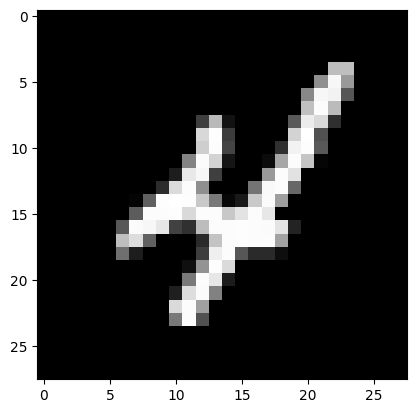

4


In [305]:
import matplotlib.pyplot as plt
# vemos los datos
i = 9
plt.imshow(x_train[i], cmap='gray')
plt.show()
print(y_train[i])

In [321]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [447]:
model = tf.keras.models.Sequential([
    # capa aplanar: comvierte en un array de una dimensión la matriz de entrada
  tf.keras.layers.Flatten(input_shape=(28, 28)),

    # esta es una capa densa con activación relu de 128 neuronas
  tf.keras.layers.Dense(128, activation='relu'),

    # aquí hacemos un dropout (apagar aleatoriamente ciertas conexiones 
    # para evitar conexiones demasiado fuertes y encontrar otros patrones de relación)
  tf.keras.layers.Dropout(0.2),

    # otra capa densa de 10 neuronas sin función de activación para obtener la salida
    #  (10 números posibles)
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

In [348]:
# vemos que funciona el forward pass:

predictions = model(x_train[:5]).numpy()
predictions = tf.nn.softmax(predictions).numpy()
print(np.round(predictions*100))

[[  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.]
 [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]]


In [448]:
model.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
600/600 [==============================] - 1s 1ms/step - loss: 0.3761 - accuracy: 0.8914
Epoch 2/50
600/600 [==============================] - 1s 1ms/step - loss: 0.1803 - accuracy: 0.9481
Epoch 3/50
600/600 [==============================] - 1s 1ms/step - loss: 0.1379 - accuracy: 0.9591
Epoch 4/50
600/600 [==============================] - 1s 1ms/step - loss: 0.1118 - accuracy: 0.9670
Epoch 5/50
600/600 [==============================] - 1s 1ms/step - loss: 0.0966 - accuracy: 0.9710
Epoch 6/50
600/600 [==============================] - 1s 1ms/step - loss: 0.0856 - accuracy: 0.9737
Epoch 7/50
600/600 [==============================] - 1s 1ms/step - loss: 0.0725 - accuracy: 0.9775
Epoch 8/50
600/600 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9796
Epoch 9/50
600/600 [==============================] - 1s 1ms/step - loss: 0.0589 - accuracy: 0.9822
Epoch 10/50
600/600 [==============================] - 1s 1ms/step - loss: 0.0539 - accuracy: 0.9825

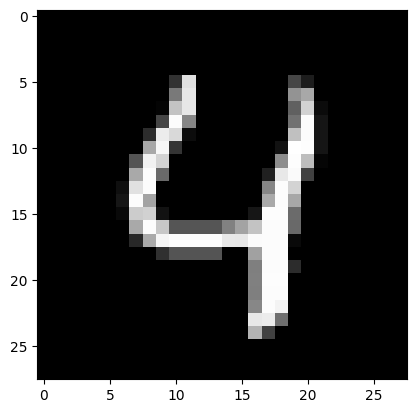

Es:  4
Predice:  4


In [449]:
# vemos los datos
i = 4
plt.imshow(x_test[i], cmap='gray')
plt.show()
print('Es: ',y_test[i])

predictions = model(x_test[i:i+1]).numpy()
predictions = tf.nn.softmax(predictions).numpy()
print('Predice: ',np.argmax(predictions))

In [450]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0874 - accuracy: 0.9814 - 294ms/epoch - 939us/step


[0.08735989034175873, 0.9814000129699707]

# Como envolver un modelo en otro:

In [451]:
model.trainable = False

In [452]:
# Esto es un wrap de modelos:
model_prob = tf.keras.models.Sequential([
    model, # 'metemos nuestro modelo como capa'
    tf.keras.layers.Softmax()
])

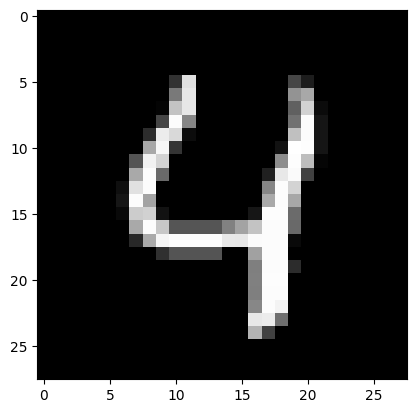

Es:  4
Predice:  4


In [461]:
# vemos los datos
i = 4
plt.imshow(x_test[i], cmap='gray')
plt.show()
print('Es: ',y_test[i])

predictions = model_prob(x_test[i:i+1]).numpy()
print('Predice: ',np.argmax(predictions))